In [0]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

Using Theano backend.


In [0]:
input_file = codecs.open("energy20170801T140040.csv", "r",encoding='utf-8', errors='replace')
output_file = open("energy20170801T140040_clean.csv", "w")

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

In [0]:
questions = pd.read_csv("energy20170801T140040_clean.csv")
#questions.columns=['text', 'choose_one', 'class_label']
questions.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,NaN,2017-08-01 19:00:45.000,NaN,"{'user_mentions': [{'indices': [3, 13], 'name'...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Proud to announ...","<a href=""http://twitter.com/download/android"" ...",RT @SwitchMed: Proud to announce #SwitcherOfth...,2017-08-01 19:00:45.414,False,"{'profile_background_color': 'F5F8FA', 'contri..."
1,NaN,NaN,2017-08-01 19:00:47.000,"[0, 71]","{'user_mentions': [], 'hashtags': [], 'symbols...",NaN,NaN,0.0,False,low,...,8.924156e+17,8.924156e+17,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Oddly enough the only one I don't really like ...,2017-08-01 19:00:47.996,False,"{'profile_background_color': '000000', 'contri..."
2,NaN,NaN,2017-08-01 19:00:49.000,NaN,"{'user_mentions': [{'indices': [3, 10], 'name'...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Chinese envoy t...","<a href=""http://twitter.com/download/android"" ...",RT @XHNews: Chinese envoy to @UN calls for neg...,2017-08-01 19:00:49.694,False,"{'profile_background_color': 'DBE9ED', 'contri..."
3,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [57, 69], 'name...",NaN,NaN,0.0,False,low,...,8.924587e+17,8.924587e+17,0.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Let's try that again: Tweets like this happen ...,2017-08-01 19:00:54.314,False,"{'profile_background_color': '1A1B1F', 'contri..."
4,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [97, 108], 'nam...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,NaN,"<a href=""https://flutter.social"" rel=""nofollow...",#Oil Price Update: $51.82 \n\n(#Brent $Crude) ...,2017-08-01 19:00:54.738,False,"{'profile_background_color': 'EEEEEE', 'contri..."


In [0]:
questions.describe()

,favorite_count,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,quoted_status_id,quoted_status_id_str,retweet_count
count,9513.0,9.513000e+03,9.513000e+03,1.390000e+02,1.390000e+02,2.100000e+02,2.100000e+02,5383.000000,8.250000e+02,8.250000e+02,9513.0
mean,0.0,8.925228e+17,8.925228e+17,8.910052e+17,8.910052e+17,1.447012e+17,1.447012e+17,0.010589,8.901326e+17,8.901326e+17,0.0
std,0.0,3.740939e+13,3.740939e+13,1.253212e+16,1.253212e+16,3.142542e+17,3.142542e+17,0.102366,1.604989e+16,1.604989e+16,0.0
min,0.0,8.924601e+17,8.924601e+17,7.494779e+17,7.494779e+17,7.592510e+05,7.592510e+05,0.000000,6.756808e+17,6.756808e+17,0.0
25%,0.0,8.924887e+17,8.924887e+17,8.924531e+17,8.924531e+17,3.162309e+07,3.162309e+07,0.000000,8.921658e+17,8.921658e+17,0.0
50%,0.0,8.925226e+17,8.925226e+17,8.924862e+17,8.924862e+17,2.522305e+08,2.522305e+08,0.000000,8.924022e+17,8.924022e+17,0.0
75%,0.0,8.925590e+17,8.925590e+17,8.925126e+17,8.925126e+17,3.066856e+09,3.066856e+09,0.000000,8.924762e+17,8.924762e+17,0.0
max,0.0,8.925779e+17,8.925779e+17,8.925764e+17,8.925764e+17,8.920967e+17,8.920967e+17,1.000000,8.925728e+17,8.925728e+17,0.0


In [0]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,NaN,2017-08-01 19:00:45.000,NaN,"{'user_mentions': [{'indices': [3, 13], 'name'...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Proud to announ...","<a href=""http://twitter.com/download/android"" ...",rt proud to announce switcherofthemonth 4 o...,2017-08-01 19:00:45.414,False,"{'profile_background_color': 'F5F8FA', 'contri..."
1,NaN,NaN,2017-08-01 19:00:47.000,"[0, 71]","{'user_mentions': [], 'hashtags': [], 'symbols...",NaN,NaN,0.0,False,low,...,8.924156e+17,8.924156e+17,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",oddly enough the only one i don't really like ...,2017-08-01 19:00:47.996,False,"{'profile_background_color': '000000', 'contri..."
2,NaN,NaN,2017-08-01 19:00:49.000,NaN,"{'user_mentions': [{'indices': [3, 10], 'name'...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Chinese envoy t...","<a href=""http://twitter.com/download/android"" ...",rt chinese envoy to calls for negotiated sol...,2017-08-01 19:00:49.694,False,"{'profile_background_color': 'DBE9ED', 'contri..."
3,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [57, 69], 'name...",NaN,NaN,0.0,False,low,...,8.924587e+17,8.924587e+17,0.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",let's try that again tweets like this happen ...,2017-08-01 19:00:54.314,False,"{'profile_background_color': '1A1B1F', 'contri..."
4,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [97, 108], 'nam...",NaN,NaN,0.0,False,low,...,NaN,NaN,0.0,False,NaN,"<a href=""https://flutter.social"" rel=""nofollow...",oil price update 51 82 \n\n( brent crude) ...,2017-08-01 19:00:54.738,False,"{'profile_background_color': 'EEEEEE', 'contri..."


In [0]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.tail()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
9515,9515,NaN,NaN,2017-08-02 02:48:43.000,NaN,"{'user_mentions': [{'indices': [3, 16], 'name'...",NaN,NaN,0.0,False,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Keep ur #Busine...","<a href=""http://twitter.com/download/android"" ...",rt keep ur business costs down by installing...,2017-08-02 02:48:43.067,False,"{'profile_background_color': 'F5F8FA', 'contri..."
9516,9516,NaN,NaN,2017-08-02 02:48:43.000,NaN,"{'user_mentions': [{'indices': [3, 16], 'name'...",NaN,NaN,0.0,False,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Our 2017 Chapma...","<a href=""http://twitter.com/download/iphone"" r...",rt our 2017 chapman lecture is aug 15 at 6 30...,2017-08-02 02:48:43.154,False,"{'profile_background_color': 'C0DEED', 'contri..."
9517,9517,NaN,NaN,2017-08-02 02:48:43.000,NaN,"{'user_mentions': [{'indices': [3, 16], 'name'...",NaN,NaN,0.0,False,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': '#Solar Speed Ch...","<a href=""http://twitter.com/download/android"" ...","rt solar speed checking light, widely use by...",2017-08-02 02:48:43.375,False,"{'profile_background_color': 'F5F8FA', 'contri..."
9518,9518,NaN,NaN,2017-08-02 02:48:45.000,NaN,"{'user_mentions': [{'indices': [3, 15], 'name'...",NaN,NaN,0.0,False,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'We have a selec...","<a href=""http://twitter.com/download/android"" ...",rt we have a selection of project lamps ready...,2017-08-02 02:48:45.045,False,"{'profile_background_color': 'F5F8FA', 'contri..."
9519,9519,NaN,NaN,2017-08-02 02:48:45.000,NaN,"{'user_mentions': [{'indices': [3, 15], 'name'...",NaN,NaN,0.0,False,...,NaN,NaN,0.0,False,"{'coordinates': None, 'text': 'Keep ur #Busine...","<a href=""http://twitter.com/download/android"" ...",rt keep ur business costs down by installing...,2017-08-02 02:48:45.425,False,"{'profile_background_color': 'F5F8FA', 'contri..."


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [0]:
clean_questions["text"] = str(clean_questions["text"])

In [0]:
clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,tokens
0,0,NaN,NaN,2017-08-01 19:00:45.000,NaN,"{'user_mentions': [{'indices': [3, 13], 'name'...",NaN,NaN,0.0,False,...,NaN,0.0,False,"{'coordinates': None, 'text': 'Proud to announ...","<a href=""http://twitter.com/download/android"" ...",0 rt proud to announce switcherofthemo...,2017-08-01 19:00:45.414,False,"{'profile_background_color': 'F5F8FA', 'contri...","[0, rt, proud, to, announce, switcherofthemont..."
1,1,NaN,NaN,2017-08-01 19:00:47.000,"[0, 71]","{'user_mentions': [], 'hashtags': [], 'symbols...",NaN,NaN,0.0,False,...,8.924156e+17,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0 rt proud to announce switcherofthemo...,2017-08-01 19:00:47.996,False,"{'profile_background_color': '000000', 'contri...","[0, rt, proud, to, announce, switcherofthemont..."
2,2,NaN,NaN,2017-08-01 19:00:49.000,NaN,"{'user_mentions': [{'indices': [3, 10], 'name'...",NaN,NaN,0.0,False,...,NaN,0.0,False,"{'coordinates': None, 'text': 'Chinese envoy t...","<a href=""http://twitter.com/download/android"" ...",0 rt proud to announce switcherofthemo...,2017-08-01 19:00:49.694,False,"{'profile_background_color': 'DBE9ED', 'contri...","[0, rt, proud, to, announce, switcherofthemont..."
3,3,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [57, 69], 'name...",NaN,NaN,0.0,False,...,8.924587e+17,0.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0 rt proud to announce switcherofthemo...,2017-08-01 19:00:54.314,False,"{'profile_background_color': '1A1B1F', 'contri...","[0, rt, proud, to, announce, switcherofthemont..."
4,4,NaN,NaN,2017-08-01 19:00:54.000,NaN,"{'user_mentions': [{'indices': [97, 108], 'nam...",NaN,NaN,0.0,False,...,NaN,0.0,False,NaN,"<a href=""https://flutter.social"" rel=""nofollow...",0 rt proud to announce switcherofthemo...,2017-08-01 19:00:54.738,False,"{'profile_background_color': 'EEEEEE', 'contri...","[0, rt, proud, to, announce, switcherofthemont..."


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

5036080 words total, with a vocabulary size of 275
Max sentence length is 529


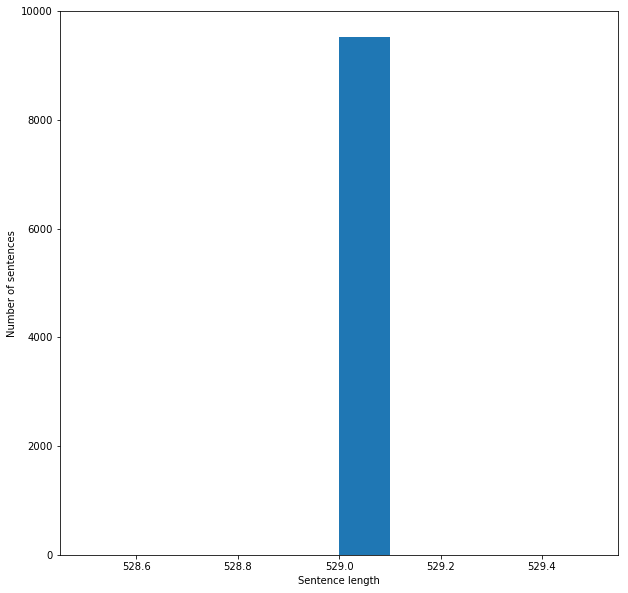

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

KeyError: 'class_label'